In [3]:
#importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


review       0
sentiment    0
dtype: int64


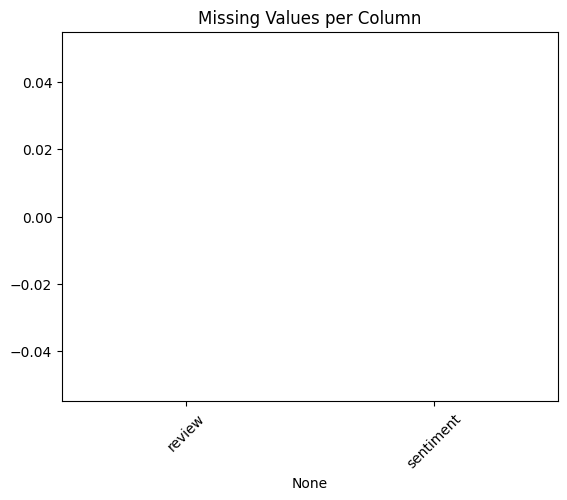

In [ ]:
# nulls values
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls)
sns.barplot(x=nulls.index, y=nulls.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.show()

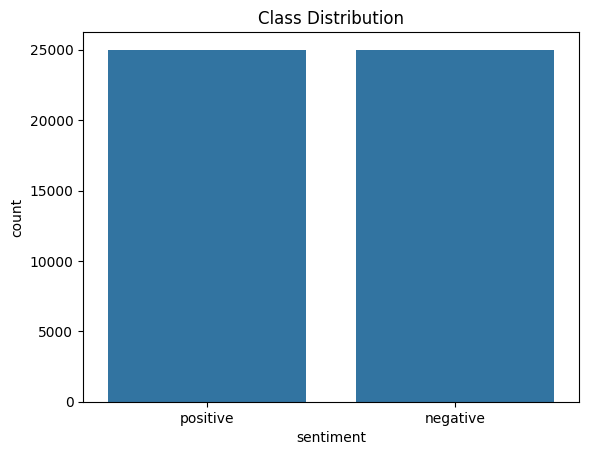

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64


In [ ]:
# Class distribution
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.show()
print(df['sentiment'].value_counts(normalize=True))

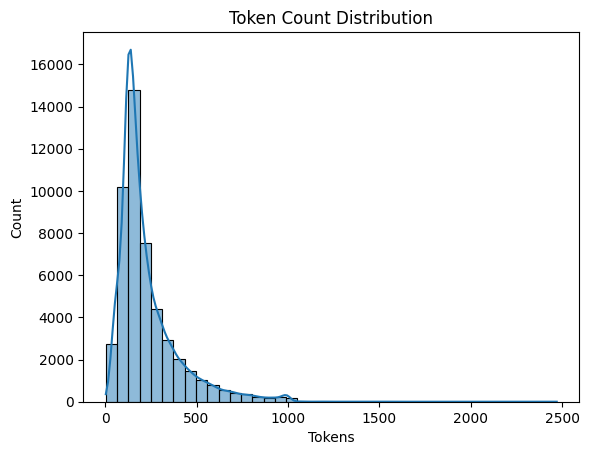

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64


In [ ]:
# Text length distribution using 'review' column
lengths = df['review'].astype(str).str.split().map(len)
sns.histplot(lengths, bins=40, kde=True)
plt.title('Token Count Distribution')
plt.xlabel('Tokens')
plt.show()
print(lengths.describe())

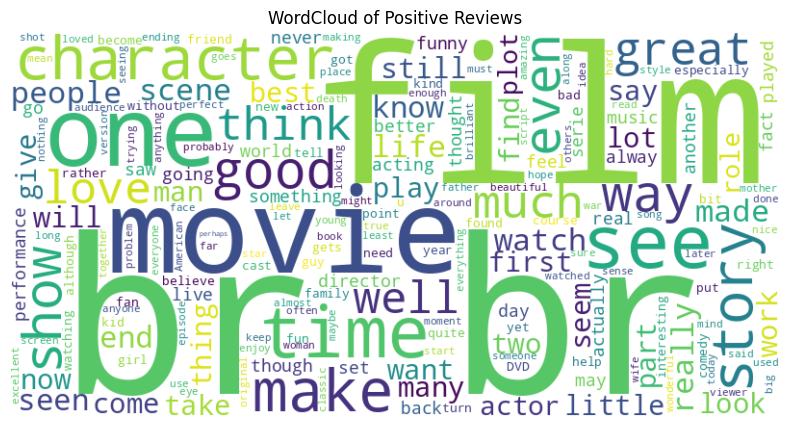

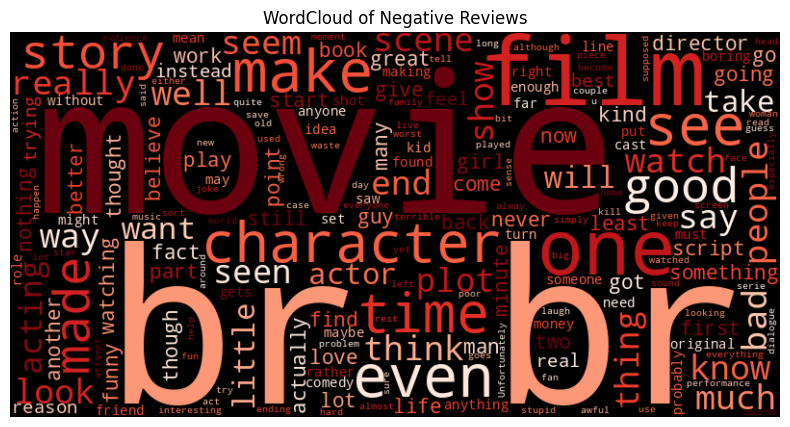

In [5]:
from wordcloud import WordCloud

# Positive reviews
pos_text = " ".join(df[df['sentiment']=='positive']['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews')
plt.show()

# Negative reviews
neg_text = " ".join(df[df['sentiment']=='negative']['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Negative Reviews')
plt.show()

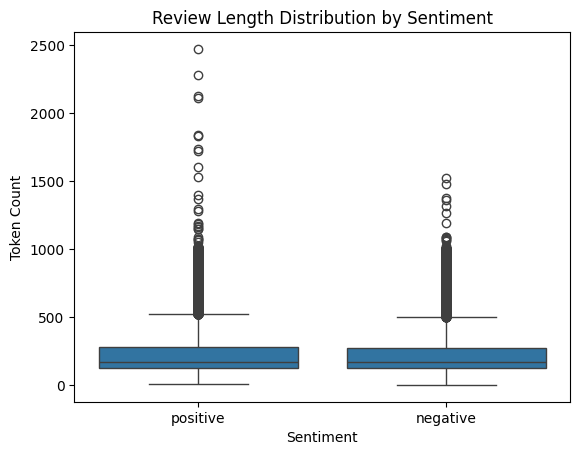

In [6]:
df['review_length'] = df['review'].astype(str).str.split().map(len)

sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Token Count')
plt.show()